# Week 2: Data Collection and Initial Exploration

This notebook covers:
1. Loading downloaded Kaggle datasets
2. Creating custom ingredient toxicity database
3. Initial data exploration
4. Data quality assessment

In [15]:
# Create processed directory if it doesn't exist
import os
os.makedirs('../data/processed', exist_ok=True)
print("✅ Processed directory created")


✅ Processed directory created


In [16]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import os

# Set up paths
DATA_RAW = Path('../data/raw')
DATA_PROCESSED = Path('../data/processed')
DATA_PROCESSED.mkdir(exist_ok=True)

print("✅ Libraries imported successfully")
print(f"📁 Raw data directory: {DATA_RAW}")
print(f"📁 Processed data directory: {DATA_PROCESSED}")

✅ Libraries imported successfully
📁 Raw data directory: ../data/raw
📁 Processed data directory: ../data/processed


In [17]:
# Check what files we have downloaded
print("📋 Files in raw data directory:")
for file in DATA_RAW.glob('*'):
    if file.is_file():
        size_mb = file.stat().st_size / (1024 * 1024)
        print(f"  📄 {file.name} ({size_mb:.1f} MB)")

📋 Files in raw data directory:
  📄 food.csv (2.5 MB)
  📄 food1.csv (2.5 MB)


In [18]:
# Load the existing database we already created
ingredient_db = pd.read_csv('../data/processed/ingredient_toxicity_db.csv')

print(f"✅ Loaded ingredient database with {len(ingredient_db)} ingredients")
print(f"📁 Loaded from: ../data/processed/ingredient_toxicity_db.csv")

# Display first few rows
print("\n🔍 First 10 ingredients:")
ingredient_db.head(10)


✅ Loaded ingredient database with 40 ingredients
📁 Loaded from: ../data/processed/ingredient_toxicity_db.csv

🔍 First 10 ingredients:


,ingredient_name,toxicity_score,category,health_impact,allergen_risk,is_toxic,risk_level
0,trans_fat,95,fat,very_high,none,1,High Risk
1,high_fructose_corn_syrup,90,sweetener,very_high,none,1,High Risk
2,sodium_nitrite,90,preservative,very_high,none,1,High Risk
3,bha,85,preservative,high,none,1,High Risk
4,bht,85,preservative,high,none,1,High Risk
5,msg,85,flavor_enhancer,high,none,1,High Risk
6,aspartame,80,sweetener,high,none,1,High Risk
7,artificial_colors,75,additive,high,none,1,High Risk
8,sodium_benzoate,75,preservative,medium,none,1,High Risk
9,potassium_bromate,70,flour_treatment,high,none,1,Medium Risk


In [19]:
# Load Kaggle datasets (if available)
datasets = {}

# Try to load common food dataset files
possible_files = [
    'nutrition.csv',
    'food_nutrition.csv', 
    'recipes.csv',
    'food_data.csv',
    'ingredients.csv'
]

for filename in possible_files:
    filepath = DATA_RAW / filename
    if filepath.exists():
        try:
            df = pd.read_csv(filepath)
            datasets[filename] = df
            print(f"✅ Loaded {filename}: {df.shape}")
        except Exception as e:
            print(f"❌ Error loading {filename}: {e}")
    else:
        print(f"⚠️  {filename} not found")

print(f"\n📊 Total datasets loaded: {len(datasets)}")

⚠️  nutrition.csv not found
⚠️  food_nutrition.csv not found
⚠️  recipes.csv not found
⚠️  food_data.csv not found
⚠️  ingredients.csv not found

📊 Total datasets loaded: 0


In [20]:
# Explore our custom ingredient database
print("📊 Ingredient Database Analysis")
print("=" * 40)

# Basic statistics
print(f"Total ingredients: {len(ingredient_db)}")
print(f"Average toxicity score: {ingredient_db['toxicity_score'].mean():.1f}")
print(f"Median toxicity score: {ingredient_db['toxicity_score'].median():.1f}")

print("\n📈 Risk Level Distribution:")
print(ingredient_db['risk_level'].value_counts())

print("\n🏷️ Category Distribution:")
print(ingredient_db['category'].value_counts())

📊 Ingredient Database Analysis
Total ingredients: 40
Average toxicity score: 39.4
Median toxicity score: 37.5

📈 Risk Level Distribution:
High Risk      9
Medium Risk    8
Low Risk       8
Safe           7
Name: risk_level, dtype: int64

🏷️ Category Distribution:
preservative       8
thickener          7
sweetener          4
fat                3
mineral            2
vitamin            2
leavening          2
flavor             2
emulsifier         2
flour_treatment    1
protein            1
additive           1
flavor_enhancer    1
macronutrient      1
fiber              1
grain              1
spice              1
Name: category, dtype: int64


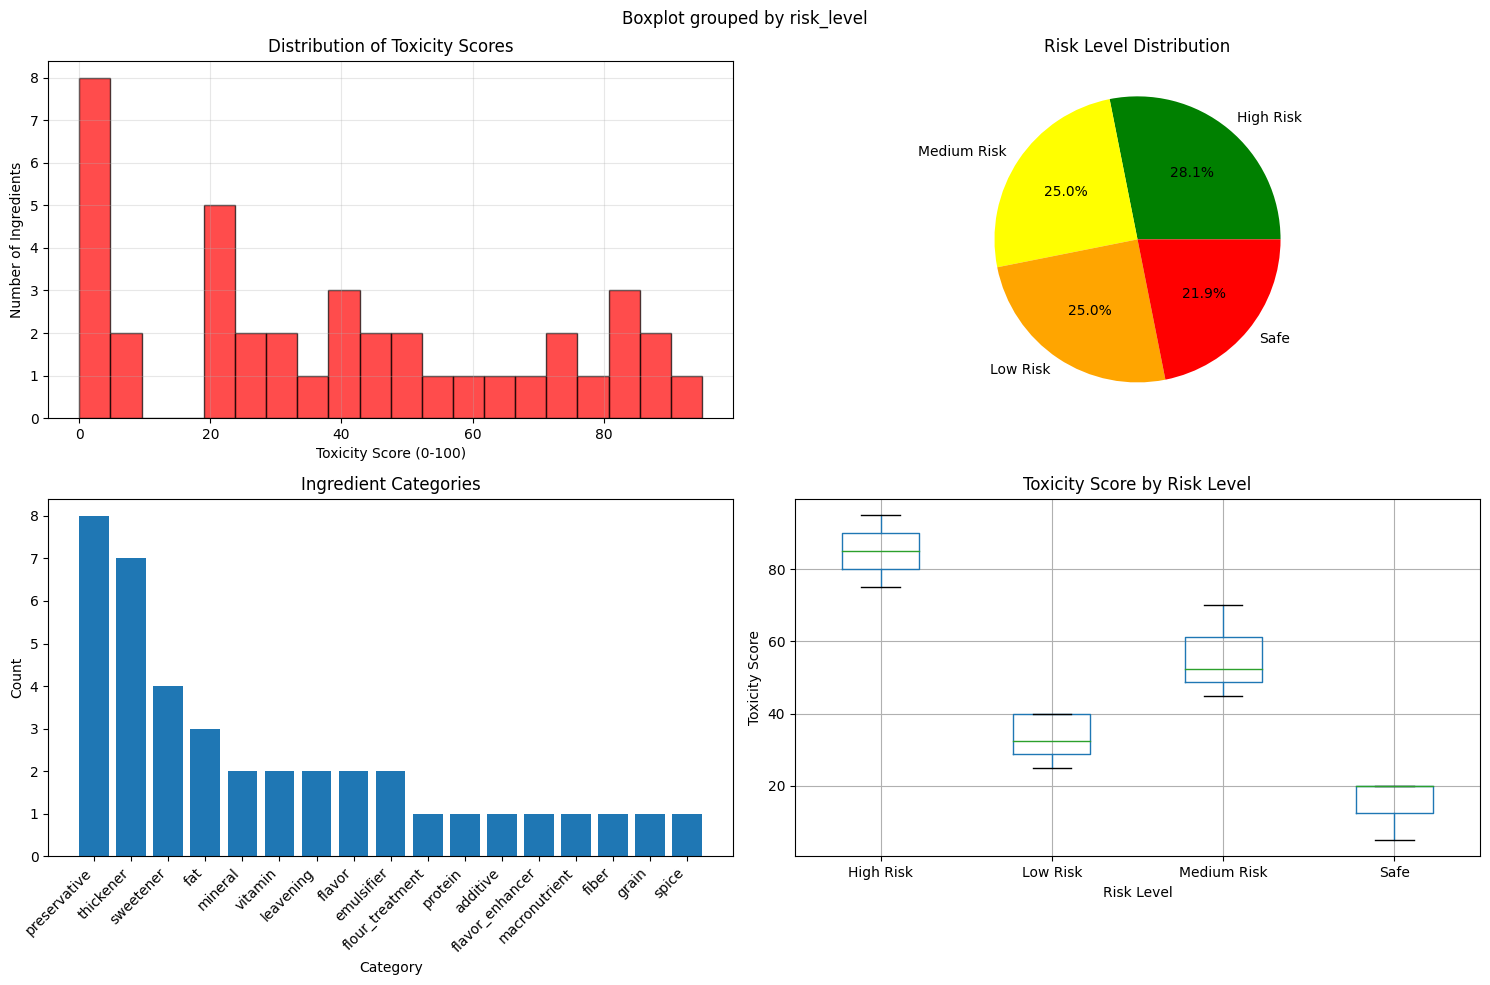

📊 Visualizations saved to reports/figures/


In [22]:
# Create visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. Toxicity score distribution
axes[0,0].hist(ingredient_db['toxicity_score'], bins=20, alpha=0.7, color='red', edgecolor='black')
axes[0,0].set_title('Distribution of Toxicity Scores')
axes[0,0].set_xlabel('Toxicity Score (0-100)')
axes[0,0].set_ylabel('Number of Ingredients')
axes[0,0].grid(True, alpha=0.3)

# 2. Risk level pie chart
risk_counts = ingredient_db['risk_level'].value_counts()
colors = ['green', 'yellow', 'orange', 'red']
axes[0,1].pie(risk_counts.values, labels=risk_counts.index, autopct='%1.1f%%', colors=colors)
axes[0,1].set_title('Risk Level Distribution')

# 3. Category distribution
category_counts = ingredient_db['category'].value_counts()
axes[1,0].bar(range(len(category_counts)), category_counts.values)
axes[1,0].set_title('Ingredient Categories')
axes[1,0].set_xlabel('Category')
axes[1,0].set_ylabel('Count')
axes[1,0].set_xticks(range(len(category_counts)))
axes[1,0].set_xticklabels(category_counts.index, rotation=45, ha='right')

# 4. Toxicity by category boxplot
ingredient_db.boxplot(column='toxicity_score', by='risk_level', ax=axes[1,1])
axes[1,1].set_title('Toxicity Score by Risk Level')
axes[1,1].set_xlabel('Risk Level')
axes[1,1].set_ylabel('Toxicity Score')

plt.tight_layout()
plt.savefig('../reports/figures/week2_data_exploration.png', dpi=300, bbox_inches='tight')
plt.show()

print("📊 Visualizations saved to reports/figures/")

In [23]:
# Data quality assessment
print("🔍 Data Quality Assessment")
print("=" * 30)

# Check for missing values
print("Missing values:")
print(ingredient_db.isnull().sum())

# Check for duplicates
duplicates = ingredient_db.duplicated().sum()
print(f"\nDuplicate rows: {duplicates}")

# Check data types
print("\nData types:")
print(ingredient_db.dtypes)

# Summary statistics
print("\nSummary statistics for toxicity_score:")
print(ingredient_db['toxicity_score'].describe())

🔍 Data Quality Assessment
Missing values:
ingredient_name    0
toxicity_score     0
category           0
health_impact      0
allergen_risk      0
is_toxic           0
risk_level         8
dtype: int64

Duplicate rows: 0

Data types:
ingredient_name    object
toxicity_score      int64
category           object
health_impact      object
allergen_risk      object
is_toxic            int64
risk_level         object
dtype: object

Summary statistics for toxicity_score:
count    40.000000
mean     39.375000
std      31.402831
min       0.000000
25%      16.250000
50%      37.500000
75%      66.250000
max      95.000000
Name: toxicity_score, dtype: float64


In [24]:
# Save processed data
print("💾 Saving processed data...")

# Save ingredient database
ingredient_db.to_csv(DATA_PROCESSED / 'ingredient_toxicity_db.csv', index=False)
print(f"✅ Saved ingredient database: {len(ingredient_db)} rows")

# Save any loaded Kaggle datasets to processed folder
for name, df in datasets.items():
    processed_name = f"processed_{name}"
    df.to_csv(DATA_PROCESSED / processed_name, index=False)
    print(f"✅ Saved {processed_name}: {df.shape}")

print("\n🎉 Week 2 Data Collection Complete!")
print("\n📋 Next Steps (Week 3):")
print("  1. Exploratory Data Analysis (EDA)")
print("  2. Data preprocessing")
print("  3. Feature engineering")
print("  4. Data splitting for ML")

💾 Saving processed data...
✅ Saved ingredient database: 40 rows

🎉 Week 2 Data Collection Complete!

📋 Next Steps (Week 3):
  1. Exploratory Data Analysis (EDA)
  2. Data preprocessing
  3. Feature engineering
  4. Data splitting for ML
